In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


image = cv.imread("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/05_Final_Ground_Truth_Data/Composite_Images/C1_0001_D3.png")
#convert the image to RGB (images are read in BGR in OpenCV)
RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#print the image array
print(RGB)
print("")
#print the shape of the image array
print(RGB.shape)

[[[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [1 1 0]
  [0 1 0]
  [0 1 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [1 1 0]
  [0 1 0]
  [0 1 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 1 0]
  [1 1 0]
  [0 1 0]]

 ...

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 1 0]
  [0 1 0]
  [0 1 0]]

 [[0 1 0]
  [3 4 0]
  [0 1 0]
  ...
  [0 1 0]
  [0 1 0]
  [2 2 0]]

 [[0 1 0]
  [2 3 0]
  [4 5 0]
  ...
  [1 2 0]
  [2 2 0]
  [2 2 0]]]

(320, 320, 3)


In [2]:
(R,G,B) = cv.split(image)

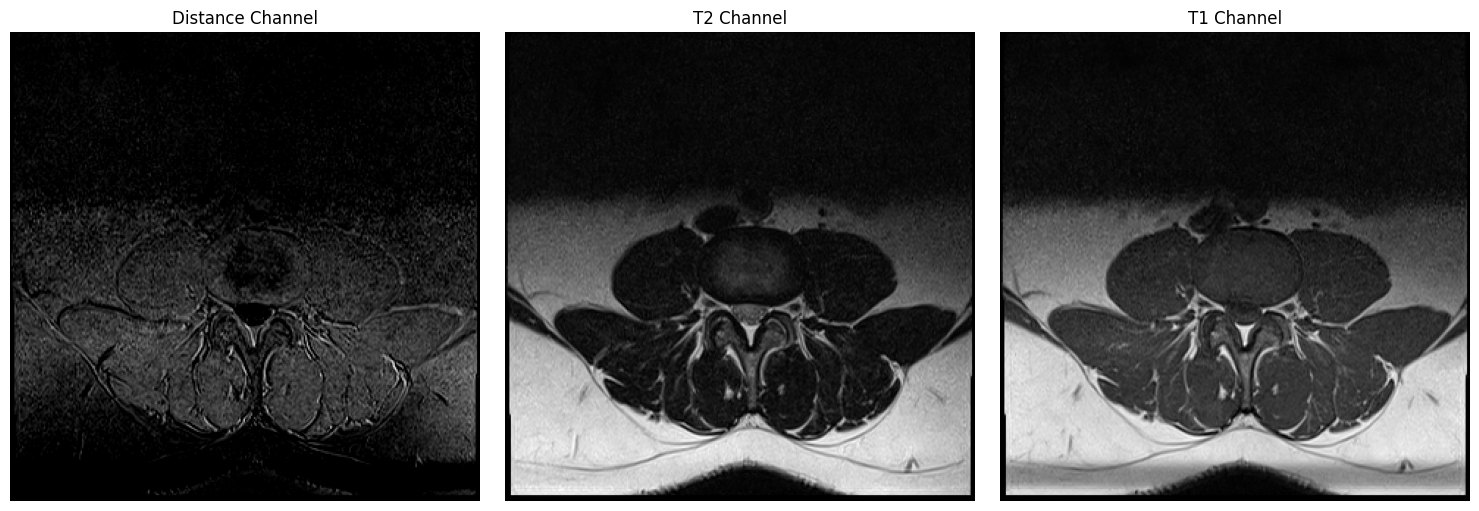

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray')
plt.title('Distance Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray')
plt.title('T2 Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title('T1 Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
mask = cv.imread("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/05_Final_Ground_Truth_Data/Label_Images/L1_0001_D3.png")
print(mask.shape)
_, _, new_B = cv.split(mask)

(320, 320, 3)


In [60]:
mask = cv.imread("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/05_Final_Ground_Truth_Data/Label_Images/L1_0001_D3.png",cv.IMREAD_GRAYSCALE)
print(mask.shape)

(320, 320)


In [29]:
zeros = np.zeros_like(B)

In [33]:
combined_image = cv.merge([G, new_B, zeros])

In [34]:
# combined_rgb = cv.cvtColor(combined_image, cv.COLOR_BAYER_BG2GRAY)
combined_gray = cv.addWeighted(B, 0.5, new_B, 0.5, 0)

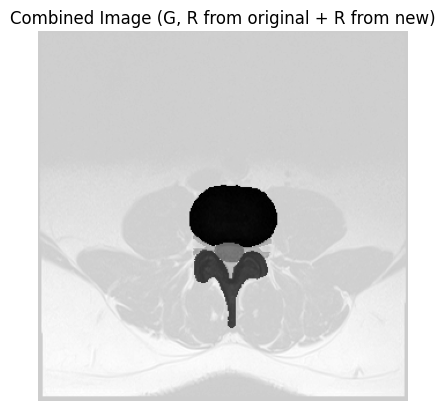

In [35]:
combined_gray = cv.cvtColor(combined_image, cv.COLOR_BGR2GRAY)
plt.imshow(combined_gray, cmap='gray')
plt.title("Combined Image (G, R from original + R from new)")
plt.axis('off')
plt.show()

In [ ]:
# import os
# import cv2 as cv
# import numpy as np
# from tqdm import tqdm

# # Paths
# base_path = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/05_Final_Ground_Truth_Data"
# composite_path = os.path.join(base_path, "Composite_Images")
# mask_path = os.path.join(base_path, "Label_Images")

# # Output folders
# output_T1 = os.path.join(base_path, "T1_composite")
# output_T2 = os.path.join(base_path, "T2_composite")
# output_T1_T2 = os.path.join(base_path, "T1_T2_composite")

# # Create output dirs if they don't exist
# os.makedirs(output_T1, exist_ok=True)
# os.makedirs(output_T2, exist_ok=True)
# os.makedirs(output_T1_T2, exist_ok=True)

# # List all image files in Composite_Images
# image_files = sorted([f for f in os.listdir(composite_path) if f.endswith(".png")])

# # First loop: B channel + Mask → [B, Mask, 0]
# for filename in tqdm(image_files, desc="Creating T1_composite"):
#     image = cv.imread(os.path.join(composite_path, filename))
#     mask = cv.imread(os.path.join(mask_path, filename), cv.IMREAD_GRAYSCALE)
#     mask_resized = cv.resize(mask, (image.shape[1], image.shape[0]))

#     B, G, R = cv.split(image)
#     #_,_,mask_R =cv.split(mask)

#     zeros = np.zeros_like(B)
#     composite = cv.merge([B, mask, zeros])
#     cv.imwrite(os.path.join(output_T1, filename), composite)

# # Second loop: G channel + Mask → [G, Mask, 0]
# for filename in tqdm(image_files, desc="Creating T2_composite"):
#     image = cv.imread(os.path.join(composite_path, filename))
#     mask = cv.imread(os.path.join(mask_path, filename), cv.IMREAD_GRAYSCALE)
#     mask_resized = cv.resize(mask, (image.shape[1], image.shape[0]))

#     B, G, R = cv.split(image)
#     #_,_,mask_R =cv.split(mask)
    
#     zeros = np.zeros_like(G)
#     composite = cv.merge([G, mask, zeros])
#     cv.imwrite(os.path.join(output_T2, filename), composite)

# # Third loop: G + B + Mask → [G, B, Mask]
# for filename in tqdm(image_files, desc="Creating T1_T2_composite"):
#     image = cv.imread(os.path.join(composite_path, filename))
#     mask = cv.imread(os.path.join(mask_path, filename), cv.IMREAD_GRAYSCALE)
#     mask_resized = cv.resize(mask, (image.shape[1], image.shape[0]))

#     B, G, R = cv.split(image)
#     #_,_,mask_R =cv.split(mask)
#     composite = cv.merge([G, B, mask])
#     cv.imwrite(os.path.join(output_T1_T2, filename), composite)


Creating T1_composite:   0%|          | 0/1545 [00:00<?, ?it/s]


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import os
import cv2 as cv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Paths
base_path = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/05_Final_Ground_Truth_Data"
composite_path = os.path.join(base_path, "Composite_Images")
mask_path = os.path.join(base_path, "Label_Images")

# Output folders
output_T1 = os.path.join(base_path, "T1_composite")
output_T2 = os.path.join(base_path, "T2_composite")
output_T1_T2 = os.path.join(base_path, "T1_T2_composite")

# Create output directories if they don't exist
os.makedirs(output_T1, exist_ok=True)
os.makedirs(output_T2, exist_ok=True)
os.makedirs(output_T1_T2, exist_ok=True)

# Helper function to extract suffix after first underscore (e.g., '0001_D3.png')
def extract_suffix(filename):
    return '_'.join(filename.split('_')[1:])

# Build mask lookup by suffix
mask_files = {extract_suffix(f): f for f in os.listdir(mask_path) if f.endswith('.png')}

# List all image files
image_files = [f for f in os.listdir(composite_path) if f.endswith('.png')]

# print("🔍 Showing first 5 matched image-mask pairs...\n")
# count = 0
# for filename in sorted(image_files):
#     suffix = extract_suffix(filename)

#     image_path = os.path.join(composite_path, filename)
#     mask_path_matched = os.path.join(mask_path, mask_files[suffix])

#     print(f"Matched:\n   Image: {image_path}\n   Mask:  {mask_path_matched}")

#     image = cv.imread(image_path)
#     mask = cv.imread(mask_path_matched)

#     # Convert to RGB for matplotlib display
#     image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#     mask_rgb = cv.cvtColor(mask, cv.COLOR_BGR2RGB)

#     print("image size",image_rgb.shape)
#     print("mask size",mask_rgb.shape)
#     B, G, R = cv.split(image)
#     zeros = np.zeros_like(B)
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(B)
#     plt.title(f"Original Image B: {filename}")
#     plt.axis('off')
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(G)
#     plt.title(f"Original Image G: {filename}")
#     plt.axis('off')
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(R)
#     plt.title(f"Original Image R: {filename}")
#     plt.axis('off')

#     # Split original Mask
#     mask_B, mask_G, mask_R = cv.split(mask)
#     zeros = np.zeros_like(B)

#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(mask_B)
#     plt.title(f"Original Mask B: {filename}")
#     plt.axis('off')
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(mask_G)
#     plt.title(f"Original Mask G: {filename}")
#     plt.axis('off')
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(mask_R)
#     plt.title(f"Original Mask R: {filename}")
#     plt.axis('off')

#     # # ===== T1_composite: [B, mask, 0]
#     composite_T1 = cv.merge([R, mask_G, zeros])
#     combined_gray_t1 = cv.cvtColor(composite_T1, cv.COLOR_BGR2GRAY)

#     # Show side-by-side
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(composite_T1, cmap='gray')
#     plt.title(f"Original Image: {filename}")
#     plt.axis('off')

#     # plt.subplot(1, 2, 2)
#     # plt.imshow(mask_rgb)
#     # plt.title(f"Mask: {mask_files[suffix]}")
#     # plt.axis('off')

#     plt.tight_layout()
#     plt.show()

#     count += 1
#     if count >= 3:
#         break

for filename in tqdm(image_files, desc="Processing images"):
    suffix = extract_suffix(filename)
    if suffix not in mask_files:
        print(f"No matching mask found for: {filename}")
        continue

    # Read image and corresponding mask
    image = cv.imread(os.path.join(composite_path, filename))
    mask_file = mask_files[suffix]
    mask = cv.imread(os.path.join(mask_path, mask_file),cv.IMREAD_GRAYSCALE)

    # Split original image
    B, G, R = cv.split(image)
    # G = cv.convertScaleAbs(G, alpha=1.5, beta=40)
    # R = cv.convertScaleAbs(R, alpha=1.5, beta=40)
    zeros = np.zeros_like(B)
    # clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # R = clahe.apply(R)
    # G = clahe.apply(G)

    # Split original Mask
    # _, _, mask_R = cv.split(mask)
    mask[mask == 250] = 0

     # ===== T1_T2_composite: [G, B, mask]
    composite_T1_T2 = cv.merge([G, R, mask])
    combined_gray_t1_t2 = cv.cvtColor(composite_T1_T2, cv.COLOR_BGR2GRAY)
    cv.imwrite(os.path.join(output_T1_T2, filename), combined_gray_t1_t2)

    # ===== T1_composite: [R, mask, 0]
    composite_T1 = cv.merge([R, mask, zeros])
    combined_gray_t1 = cv.cvtColor(composite_T1, cv.COLOR_BGR2GRAY)
    cv.imwrite(os.path.join(output_T1, filename), combined_gray_t1)

    # ===== T2_composite: [G, mask, 0]
    composite_T2 = cv.merge([G, mask, zeros])
    combined_gray_t2 = cv.cvtColor(composite_T2, cv.COLOR_BGR2GRAY)
    cv.imwrite(os.path.join(output_T2, filename), combined_gray_t2)

   

Processing images: 100%|██████████| 1545/1545 [00:25<00:00, 59.45it/s]


In [ ]:
import os
import pandas as pd
import re


def extract_case_id(filename):
    """Extracts case ID like C1_0001 from filename like C1_0001.nii.gz"""
    if filename.endswith(".nii.gz"):
        return filename[:-7]  # Remove .nii.gz
    return os.path.splitext(filename)[0]


def assign_image_paths_to_reports(image_folder, report_csv_path, output_csv_path):

    df = pd.read_csv(report_csv_path).dropna()

    # Fill in missing reports
    df["Clinician's Notes"] = df["Clinician's Notes"]

    df['case_id'] = df['Patient ID'].apply(lambda x: f"C1_{int(x):04d}")
    
    df = df[df["Clinician's Notes"].str.strip().astype(bool)]
    print(f"After filtering empty notes: {len(df)} rows")

    df = df.drop(columns=['Patient ID'])

    # Build mapping from image filenames
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.nii.gz')]
    print(f"Total image files found: {len(image_files)}")
    case_to_image_path = {extract_case_id(f): os.path.join(image_folder, f) for f in image_files}

    # Show a few mapped keys
    print(f"🔍 Example case_id → path: {list(case_to_image_path.items())[:5]}")

    # Map image paths
    df['image_path'] = df['case_id'].map(case_to_image_path)

    # Show unmatched
    unmatched = df[df['image_path'].isnull()]
    if not unmatched.empty:
        print(f"{len(unmatched)} case_ids had no matching image:")
        print(unmatched['case_id'].unique()[:10])

    df = df.dropna(subset=['image_path'])
    print(f"Final matched rows: {len(df)}")

    df.to_csv(output_csv_path, index=False)
    print(f"Saved to: {output_csv_path}")

# Use your actual paths here
image_folder = '/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/t1_t2_composite_axial_3D'
report_csv_path = '/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/Radiologists_Report.csv'
output_csv_path = 't1_t2_composite_Radiologists_Report.csv'

assign_image_paths_to_reports(image_folder, report_csv_path, output_csv_path)


ValueError: invalid literal for int() with base 10: 'S1_1'

In [8]:
import pandas as pd

# Load the two source CSVs
paths_df = pd.read_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/S1_composite_images_notes_gpt.csv")   # contains: patient_id, clinical_notes
notes_df = pd.read_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/s1_image_notes_gpt_190_clinical_no_recommendations.csv")      # contains: patient_id, image_path

# Ensure patient_id is string in both
notes_df["case_id"] = notes_df["case_id"].astype(str)
paths_df["case_id"] = paths_df["case_id"].astype(str)

# Initialize new DataFrame
merged_data = []

# Loop through the path DataFrame
for _, row in paths_df.iterrows():
    patient_id = row["case_id"]
    image_path = row["image_path"]

    # Find matching note from the notes DataFrame
    note_row = notes_df[notes_df["case_id"] == patient_id]

    if not note_row.empty:
        clinical_note = note_row.iloc[0]["Clinician's Notes"]
    else:
        clinical_note = "No note found"

    # Append to the new DataFrame as a dictionary
    merged_data.append({
        "case_id": patient_id,
        "image_path": image_path,
        "Clinician's Notes": clinical_note
    })

# Create new DataFrame
new_df = pd.DataFrame(merged_data)

# Save to CSV
new_df.to_csv("S1_composite_images_notes_gpt_humaized_ordered.csv", index=False)

print("✅ New DataFrame saved as 'merged_dataframe.csv'")


✅ New DataFrame saved as 'merged_dataframe.csv'


In [70]:
import os
import pandas as pd
from sklearn.model_selection import KFold

# Load your dataset
df = pd.read_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/Evaluation/t2_composite_Radiologists_Report.csv")  # <-- replace with your actual file

# Create output folder
output_dir = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/src/kfold_splits/t2_composite"
os.makedirs(output_dir, exist_ok=True)

# 10-fold without shuffle
kf = KFold(n_splits=10, shuffle=False)

for fold, (train_val_idx, test_idx) in enumerate(kf.split(df)):
    fold_dir = os.path.join(output_dir, f"fold_{fold+1}_image")
    os.makedirs(fold_dir, exist_ok=True)

    # Test set
    test_df = df.iloc[test_idx].reset_index(drop=True)

    # Train + Validation set
    train_val_df = df.iloc[train_val_idx].reset_index(drop=True)

    # Split train/val sequentially (no random split)
    val_size = int(0.2 * len(train_val_df))  # 20% for validation

    val_df = train_val_df.iloc[:val_size].reset_index(drop=True)
    train_df = train_val_df.iloc[val_size:].reset_index(drop=True)

    # Save CSVs
    train_df.to_csv(os.path.join(fold_dir, "train.csv"), index=False)
    val_df.to_csv(os.path.join(fold_dir, "val.csv"), index=False)
    test_df.to_csv(os.path.join(fold_dir, "test.csv"), index=False)

    print(f"Fold {fold+1} saved.")


Fold 1 saved.
Fold 2 saved.
Fold 3 saved.
Fold 4 saved.
Fold 5 saved.
Fold 6 saved.
Fold 7 saved.
Fold 8 saved.
Fold 9 saved.
Fold 10 saved.


In [8]:
import os
import nibabel as nib
import numpy as np
import cv2
from tqdm import tqdm

# === User Paths ===
images_folder = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/images_nii_fixed"     # T1 and T2 in the same folder
masks_folder = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/masks_nii_fixed"       # Masks in a separate folder
output_folder = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused"

os.makedirs(output_folder, exist_ok=True)

# === Helper: Extract patient ID and modality ===
def get_patient_id_and_type(filename):
    basename = os.path.basename(filename)
    parts = basename.split('_')
    if len(parts) < 2:
        return None, None  # invalid filename
    pid = parts[0]
    modality = parts[1].split('.')[0].lower()  # t1 or t2
    return pid, modality

# === Collect T1 and T2 image file paths ===
patient_files = {}
for f in os.listdir(images_folder):
    if f.endswith(".nii") or f.endswith(".nii.gz"):
        pid, modality = get_patient_id_and_type(f)
        if pid is None or modality is None:
            print(f"Skipping invalid filename: {f}")
            continue
        if pid not in patient_files:
            patient_files[pid] = {}
        patient_files[pid][modality] = os.path.join(images_folder, f)

# === Collect T1 masks only from the mask folder ===
mask_files = {}
for f in os.listdir(masks_folder):
    if f.endswith(".nii") or f.endswith(".nii.gz"):
        pid, modality = get_patient_id_and_type(f)
        if modality == "t1":  # TAKE ONLY T1 MASK
            mask_files[pid] = os.path.join(masks_folder, f)

# === Find valid patients ===
valid_patients = [pid for pid in patient_files if "t1" in patient_files[pid] and "t2" in patient_files[pid] and pid in mask_files]

print(f"Total patients with T1, T2, and T1 mask found: {len(valid_patients)}")

# === Normalize slice helper ===
def normalize_slice(slice_):
    slice_ = slice_ - np.min(slice_)
    max_val = np.max(slice_)
    if max_val > 0:
        slice_ = slice_ / max_val
    return (slice_ * 255).astype(np.uint8)

# === Process each patient ===
for pid in tqdm(valid_patients, desc="Processing patients"):
    t1_path = patient_files[pid]["t1"]
    t2_path = patient_files[pid]["t2"]
    mask_path = mask_files[pid]  # only T1 mask

    # Load 3D volumes
    t1_img = nib.load(t1_path)
    t2_img = nib.load(t2_path)
    mask_img = nib.load(mask_path)

    t1_volume = t1_img.get_fdata()
    t2_volume = t2_img.get_fdata()
    mask_volume = mask_img.get_fdata()

    # Align slices (D)
    min_D = min(t1_volume.shape[2], t2_volume.shape[2], mask_volume.shape[2])
    t1_volume = t1_volume[:, :, :min_D]
    t2_volume = t2_volume[:, :, :min_D]
    mask_volume = mask_volume[:, :, :min_D]

    # Transpose to (D, H, W)
    t1_volume = np.transpose(t1_volume, (2, 0, 1))
    t2_volume = np.transpose(t2_volume, (2, 0, 1))
    mask_volume = np.transpose(mask_volume, (2, 0, 1))

    D, H, W = t1_volume.shape
    fused_slices = []

    for i in range(D):
        t1_slice = normalize_slice(t1_volume[i])
        t2_slice = normalize_slice(t2_volume[i])
        mask_slice = normalize_slice(mask_volume[i])

        # Check shape consistency and resize if needed
        target_shape = t1_slice.shape[::-1]  # (W, H)
        if t2_slice.shape != t1_slice.shape:
            t2_slice = cv2.resize(t2_slice, target_shape, interpolation=cv2.INTER_LINEAR)
        if mask_slice.shape != t1_slice.shape:
            mask_slice = cv2.resize(mask_slice, target_shape, interpolation=cv2.INTER_NEAREST)

        # Fusion using weighted averaging
        fused_slice = cv2.addWeighted(t1_slice, 1/3, t2_slice, 1/3, 0)
        fused_slice = cv2.addWeighted(fused_slice, 1, mask_slice, 1/2, 0)

        fused_slices.append(fused_slice.astype(np.float32))

    fused_volume = np.stack(fused_slices, axis=0)  # (D, H, W)

    # Transpose back to (H, W, D) for NIfTI saving
    fused_volume = np.transpose(fused_volume, (1, 2, 0))

    # Save the fused volume
    fused_img = nib.Nifti1Image(fused_volume, affine=t1_img.affine)
    output_path = os.path.join(output_folder, f"{pid}_fused.nii.gz")
    nib.save(fused_img, output_path)

    print(f"✅ Saved fused volume for patient {pid} at {output_path} with shape {fused_volume.shape}")

print(f"\n🎉 Completed fusion for {len(valid_patients)} patients 🎉")


Total patients with T1, T2, and T1 mask found: 190


Processing patients:   1%|          | 1/190 [00:00<00:21,  8.99it/s]

✅ Saved fused volume for patient 33 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/33_fused.nii.gz with shape (264, 216, 24)


Processing patients:   1%|          | 2/190 [00:00<01:41,  1.85it/s]

✅ Saved fused volume for patient 15 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/15_fused.nii.gz with shape (448, 899, 31)


Processing patients:   2%|▏         | 3/190 [00:01<01:41,  1.84it/s]

✅ Saved fused volume for patient 220 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/220_fused.nii.gz with shape (512, 512, 21)


Processing patients:   2%|▏         | 4/190 [00:01<01:20,  2.32it/s]

✅ Saved fused volume for patient 179 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/179_fused.nii.gz with shape (384, 384, 17)


Processing patients:   3%|▎         | 5/190 [00:02<01:55,  1.60it/s]

✅ Saved fused volume for patient 109 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/109_fused.nii.gz with shape (575, 800, 33)


Processing patients:   3%|▎         | 6/190 [00:03<01:51,  1.65it/s]

✅ Saved fused volume for patient 218 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/218_fused.nii.gz with shape (448, 626, 28)


Processing patients:   4%|▎         | 7/190 [00:03<01:39,  1.84it/s]

✅ Saved fused volume for patient 243 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/243_fused.nii.gz with shape (448, 478, 25)


Processing patients:   4%|▍         | 8/190 [00:04<01:33,  1.95it/s]

✅ Saved fused volume for patient 7 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/7_fused.nii.gz with shape (512, 512, 17)


Processing patients:   5%|▍         | 9/190 [00:04<01:25,  2.11it/s]

✅ Saved fused volume for patient 75 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/75_fused.nii.gz with shape (448, 462, 24)


Processing patients:   5%|▌         | 10/190 [00:04<01:11,  2.51it/s]

✅ Saved fused volume for patient 154 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/154_fused.nii.gz with shape (384, 384, 15)


Processing patients:   6%|▌         | 11/190 [00:05<01:10,  2.55it/s]

✅ Saved fused volume for patient 95 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/95_fused.nii.gz with shape (448, 448, 24)


Processing patients:   6%|▋         | 12/190 [00:05<01:12,  2.44it/s]

✅ Saved fused volume for patient 40 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/40_fused.nii.gz with shape (448, 512, 26)


Processing patients:   7%|▋         | 13/190 [00:06<01:14,  2.39it/s]

✅ Saved fused volume for patient 94 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/94_fused.nii.gz with shape (448, 512, 26)


Processing patients:   8%|▊         | 15/190 [00:07<01:45,  1.66it/s]

✅ Saved fused volume for patient 227 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/227_fused.nii.gz with shape (448, 1677, 35)
✅ Saved fused volume for patient 122 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/122_fused.nii.gz with shape (320, 320, 15)


Processing patients:   8%|▊         | 16/190 [00:08<01:21,  2.14it/s]

✅ Saved fused volume for patient 214 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/214_fused.nii.gz with shape (320, 331, 14)


Processing patients:   9%|▉         | 17/190 [00:08<01:20,  2.15it/s]

✅ Saved fused volume for patient 83 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/83_fused.nii.gz with shape (615, 367, 32)


Processing patients:   9%|▉         | 18/190 [00:08<01:15,  2.28it/s]

✅ Saved fused volume for patient 204 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/204_fused.nii.gz with shape (448, 448, 24)


Processing patients:  10%|█         | 19/190 [00:09<01:08,  2.49it/s]

✅ Saved fused volume for patient 24 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/24_fused.nii.gz with shape (448, 344, 30)


Processing patients:  11%|█         | 20/190 [00:09<01:10,  2.43it/s]

✅ Saved fused volume for patient 110 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/110_fused.nii.gz with shape (512, 512, 17)


Processing patients:  12%|█▏        | 22/190 [00:10<00:53,  3.16it/s]

✅ Saved fused volume for patient 236 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/236_fused.nii.gz with shape (448, 393, 27)
✅ Saved fused volume for patient 90 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/90_fused.nii.gz with shape (320, 254, 19)


Processing patients:  12%|█▏        | 23/190 [00:10<00:58,  2.86it/s]

✅ Saved fused volume for patient 35 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/35_fused.nii.gz with shape (512, 512, 17)


Processing patients:  13%|█▎        | 24/190 [00:10<00:58,  2.86it/s]

✅ Saved fused volume for patient 121 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/121_fused.nii.gz with shape (448, 392, 27)


Processing patients:  13%|█▎        | 25/190 [00:11<01:16,  2.17it/s]

✅ Saved fused volume for patient 231 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/231_fused.nii.gz with shape (732, 496, 31)


Processing patients:  14%|█▎        | 26/190 [00:11<01:09,  2.35it/s]

✅ Saved fused volume for patient 242 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/242_fused.nii.gz with shape (407, 424, 27)


Processing patients:  14%|█▍        | 27/190 [00:12<01:08,  2.36it/s]

✅ Saved fused volume for patient 185 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/185_fused.nii.gz with shape (512, 512, 17)


Processing patients:  15%|█▍        | 28/190 [00:12<00:58,  2.75it/s]

✅ Saved fused volume for patient 8 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/8_fused.nii.gz with shape (384, 384, 15)


Processing patients:  15%|█▌        | 29/190 [00:14<02:04,  1.29it/s]

✅ Saved fused volume for patient 133 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/133_fused.nii.gz with shape (537, 1459, 36)


Processing patients:  16%|█▌        | 30/190 [00:14<01:38,  1.62it/s]

✅ Saved fused volume for patient 108 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/108_fused.nii.gz with shape (384, 384, 17)


Processing patients:  16%|█▋        | 31/190 [00:14<01:26,  1.83it/s]

✅ Saved fused volume for patient 65 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/65_fused.nii.gz with shape (512, 356, 27)


Processing patients:  17%|█▋        | 32/190 [00:15<01:24,  1.87it/s]

✅ Saved fused volume for patient 66 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/66_fused.nii.gz with shape (658, 587, 17)


Processing patients:  17%|█▋        | 33/190 [00:15<01:14,  2.10it/s]

✅ Saved fused volume for patient 257 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/257_fused.nii.gz with shape (448, 372, 28)


Processing patients:  18%|█▊        | 34/190 [00:16<01:12,  2.16it/s]

✅ Saved fused volume for patient 22 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/22_fused.nii.gz with shape (512, 512, 17)


Processing patients:  18%|█▊        | 35/190 [00:16<01:13,  2.12it/s]

✅ Saved fused volume for patient 55 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/55_fused.nii.gz with shape (512, 512, 19)


Processing patients:  19%|█▉        | 36/190 [00:17<01:10,  2.20it/s]

✅ Saved fused volume for patient 202 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/202_fused.nii.gz with shape (448, 478, 25)


Processing patients:  19%|█▉        | 37/190 [00:17<01:11,  2.14it/s]

✅ Saved fused volume for patient 152 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/152_fused.nii.gz with shape (512, 512, 19)


Processing patients:  20%|██        | 38/190 [00:18<01:13,  2.06it/s]

✅ Saved fused volume for patient 37 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/37_fused.nii.gz with shape (448, 598, 28)


Processing patients:  21%|██        | 39/190 [00:18<01:29,  1.68it/s]

✅ Saved fused volume for patient 245 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/245_fused.nii.gz with shape (726, 563, 32)


Processing patients:  21%|██        | 40/190 [00:19<01:25,  1.75it/s]

✅ Saved fused volume for patient 187 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/187_fused.nii.gz with shape (465, 748, 20)


Processing patients:  22%|██▏       | 41/190 [00:19<01:16,  1.96it/s]

✅ Saved fused volume for patient 117 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/117_fused.nii.gz with shape (448, 448, 24)


Processing patients:  23%|██▎       | 43/190 [00:20<00:53,  2.77it/s]

✅ Saved fused volume for patient 145 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/145_fused.nii.gz with shape (448, 402, 26)
✅ Saved fused volume for patient 212 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/212_fused.nii.gz with shape (320, 240, 18)


Processing patients:  23%|██▎       | 44/190 [00:20<00:55,  2.62it/s]

✅ Saved fused volume for patient 215 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/215_fused.nii.gz with shape (448, 512, 26)


Processing patients:  24%|██▎       | 45/190 [00:21<00:50,  2.90it/s]

✅ Saved fused volume for patient 224 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/224_fused.nii.gz with shape (379, 441, 16)


Processing patients:  24%|██▍       | 46/190 [00:21<00:58,  2.48it/s]

✅ Saved fused volume for patient 28 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/28_fused.nii.gz with shape (448, 600, 28)


Processing patients:  25%|██▍       | 47/190 [00:21<00:57,  2.51it/s]

✅ Saved fused volume for patient 25 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/25_fused.nii.gz with shape (447, 462, 24)


Processing patients:  25%|██▌       | 48/190 [00:23<01:59,  1.19it/s]

✅ Saved fused volume for patient 174 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/174_fused.nii.gz with shape (640, 1435, 32)


Processing patients:  26%|██▌       | 49/190 [00:24<01:41,  1.38it/s]

✅ Saved fused volume for patient 5 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/5_fused.nii.gz with shape (512, 512, 17)


Processing patients:  26%|██▋       | 50/190 [00:24<01:39,  1.41it/s]

✅ Saved fused volume for patient 184 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/184_fused.nii.gz with shape (514, 861, 20)


Processing patients:  27%|██▋       | 51/190 [00:25<01:27,  1.60it/s]

✅ Saved fused volume for patient 45 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/45_fused.nii.gz with shape (512, 512, 17)


Processing patients:  27%|██▋       | 52/190 [00:25<01:09,  1.97it/s]

✅ Saved fused volume for patient 106 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/106_fused.nii.gz with shape (384, 384, 15)


Processing patients:  28%|██▊       | 53/190 [00:25<00:57,  2.37it/s]

✅ Saved fused volume for patient 155 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/155_fused.nii.gz with shape (384, 384, 15)


Processing patients:  28%|██▊       | 54/190 [00:28<02:37,  1.16s/it]

✅ Saved fused volume for patient 207 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/207_fused.nii.gz with shape (1168, 1058, 41)


Processing patients:  29%|██▉       | 55/190 [00:29<02:13,  1.01it/s]

✅ Saved fused volume for patient 13 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/13_fused.nii.gz with shape (514, 748, 19)


Processing patients:  29%|██▉       | 56/190 [00:29<01:51,  1.21it/s]

✅ Saved fused volume for patient 189 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/189_fused.nii.gz with shape (514, 640, 18)


Processing patients:  30%|███       | 57/190 [00:30<01:41,  1.31it/s]

✅ Saved fused volume for patient 63 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/63_fused.nii.gz with shape (658, 560, 22)


Processing patients:  31%|███       | 58/190 [00:30<01:27,  1.51it/s]

✅ Saved fused volume for patient 166 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/166_fused.nii.gz with shape (512, 512, 17)


Processing patients:  31%|███       | 59/190 [00:31<01:19,  1.64it/s]

✅ Saved fused volume for patient 32 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/32_fused.nii.gz with shape (448, 549, 27)


Processing patients:  32%|███▏      | 60/190 [00:32<01:29,  1.45it/s]

✅ Saved fused volume for patient 193 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/193_fused.nii.gz with shape (808, 531, 33)


Processing patients:  32%|███▏      | 61/190 [00:32<01:19,  1.62it/s]

✅ Saved fused volume for patient 239 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/239_fused.nii.gz with shape (512, 512, 17)


Processing patients:  33%|███▎      | 62/190 [00:32<01:03,  2.02it/s]

✅ Saved fused volume for patient 165 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/165_fused.nii.gz with shape (384, 384, 15)


Processing patients:  33%|███▎      | 63/190 [00:33<00:58,  2.17it/s]

✅ Saved fused volume for patient 192 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/192_fused.nii.gz with shape (448, 448, 24)


Processing patients:  34%|███▎      | 64/190 [00:33<00:50,  2.51it/s]

✅ Saved fused volume for patient 160 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/160_fused.nii.gz with shape (343, 284, 43)


Processing patients:  34%|███▍      | 65/190 [00:33<00:49,  2.55it/s]

✅ Saved fused volume for patient 254 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/254_fused.nii.gz with shape (448, 435, 25)


Processing patients:  35%|███▍      | 66/190 [00:34<00:49,  2.48it/s]

✅ Saved fused volume for patient 138 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/138_fused.nii.gz with shape (514, 611, 18)


Processing patients:  35%|███▌      | 67/190 [00:34<00:42,  2.87it/s]

✅ Saved fused volume for patient 190 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/190_fused.nii.gz with shape (384, 384, 15)


Processing patients:  36%|███▌      | 68/190 [00:34<00:45,  2.67it/s]

✅ Saved fused volume for patient 113 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/113_fused.nii.gz with shape (503, 461, 26)


Processing patients:  37%|███▋      | 70/190 [00:35<00:38,  3.14it/s]

✅ Saved fused volume for patient 78 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/78_fused.nii.gz with shape (512, 512, 17)
✅ Saved fused volume for patient 93 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/93_fused.nii.gz with shape (320, 292, 16)


Processing patients:  37%|███▋      | 71/190 [00:35<00:32,  3.66it/s]

✅ Saved fused volume for patient 104 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/104_fused.nii.gz with shape (320, 320, 15)


Processing patients:  38%|███▊      | 72/190 [00:36<00:44,  2.66it/s]

✅ Saved fused volume for patient 100 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/100_fused.nii.gz with shape (492, 797, 21)


Processing patients:  38%|███▊      | 73/190 [00:36<00:46,  2.53it/s]

✅ Saved fused volume for patient 69 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/69_fused.nii.gz with shape (512, 512, 17)


Processing patients:  39%|███▉      | 74/190 [00:37<01:08,  1.68it/s]

✅ Saved fused volume for patient 250 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/250_fused.nii.gz with shape (896, 896, 15)


Processing patients:  39%|███▉      | 75/190 [00:38<01:00,  1.90it/s]

✅ Saved fused volume for patient 16 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/16_fused.nii.gz with shape (448, 448, 24)


Processing patients:  40%|████      | 76/190 [00:38<00:49,  2.29it/s]

✅ Saved fused volume for patient 249 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/249_fused.nii.gz with shape (384, 384, 15)


Processing patients:  41%|████      | 77/190 [00:38<00:46,  2.41it/s]

✅ Saved fused volume for patient 44 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/44_fused.nii.gz with shape (448, 448, 24)


Processing patients:  41%|████      | 78/190 [00:39<00:53,  2.11it/s]

✅ Saved fused volume for patient 198 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/198_fused.nii.gz with shape (448, 626, 30)


Processing patients:  42%|████▏     | 79/190 [00:39<00:51,  2.15it/s]

✅ Saved fused volume for patient 136 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/136_fused.nii.gz with shape (512, 512, 17)


Processing patients:  42%|████▏     | 80/190 [00:40<00:48,  2.25it/s]

✅ Saved fused volume for patient 118 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/118_fused.nii.gz with shape (512, 427, 20)


Processing patients:  43%|████▎     | 82/190 [00:40<00:37,  2.86it/s]

✅ Saved fused volume for patient 232 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/232_fused.nii.gz with shape (448, 448, 24)
✅ Saved fused volume for patient 68 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/68_fused.nii.gz with shape (320, 320, 17)


Processing patients:  44%|████▎     | 83/190 [00:40<00:31,  3.42it/s]

✅ Saved fused volume for patient 2 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/2_fused.nii.gz with shape (320, 294, 17)


Processing patients:  44%|████▍     | 84/190 [00:41<00:35,  3.01it/s]

✅ Saved fused volume for patient 234 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/234_fused.nii.gz with shape (512, 512, 17)


Processing patients:  45%|████▍     | 85/190 [00:42<00:55,  1.90it/s]

✅ Saved fused volume for patient 146 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/146_fused.nii.gz with shape (512, 872, 27)


Processing patients:  45%|████▌     | 86/190 [00:42<00:50,  2.07it/s]

✅ Saved fused volume for patient 112 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/112_fused.nii.gz with shape (448, 448, 24)


Processing patients:  46%|████▌     | 87/190 [00:43<00:45,  2.26it/s]

✅ Saved fused volume for patient 228 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/228_fused.nii.gz with shape (448, 392, 27)


Processing patients:  46%|████▋     | 88/190 [00:43<00:40,  2.53it/s]

✅ Saved fused volume for patient 53 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/53_fused.nii.gz with shape (377, 483, 17)


Processing patients:  47%|████▋     | 89/190 [00:43<00:44,  2.25it/s]

✅ Saved fused volume for patient 163 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/163_fused.nii.gz with shape (514, 672, 20)


Processing patients:  47%|████▋     | 90/190 [00:44<00:46,  2.15it/s]

✅ Saved fused volume for patient 237 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/237_fused.nii.gz with shape (646, 611, 18)


Processing patients:  48%|████▊     | 92/190 [00:44<00:34,  2.82it/s]

✅ Saved fused volume for patient 48 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/48_fused.nii.gz with shape (448, 448, 24)
✅ Saved fused volume for patient 233 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/233_fused.nii.gz with shape (320, 320, 15)


Processing patients:  49%|████▉     | 93/190 [00:45<00:37,  2.62it/s]

✅ Saved fused volume for patient 205 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/205_fused.nii.gz with shape (448, 511, 26)


Processing patients:  50%|█████     | 95/190 [00:46<00:33,  2.87it/s]

✅ Saved fused volume for patient 241 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/241_fused.nii.gz with shape (512, 512, 19)
✅ Saved fused volume for patient 116 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/116_fused.nii.gz with shape (320, 320, 15)


Processing patients:  51%|█████     | 96/190 [00:46<00:34,  2.69it/s]

✅ Saved fused volume for patient 149 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/149_fused.nii.gz with shape (448, 512, 26)


Processing patients:  51%|█████     | 97/190 [00:46<00:37,  2.51it/s]

✅ Saved fused volume for patient 161 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/161_fused.nii.gz with shape (512, 464, 19)


Processing patients:  52%|█████▏    | 98/190 [00:47<00:35,  2.57it/s]

✅ Saved fused volume for patient 170 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/170_fused.nii.gz with shape (448, 448, 24)


Processing patients:  52%|█████▏    | 99/190 [00:47<00:34,  2.62it/s]

✅ Saved fused volume for patient 229 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/229_fused.nii.gz with shape (448, 383, 27)


Processing patients:  53%|█████▎    | 100/190 [00:47<00:31,  2.84it/s]

✅ Saved fused volume for patient 19 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/19_fused.nii.gz with shape (368, 351, 33)


Processing patients:  53%|█████▎    | 101/190 [00:48<00:33,  2.64it/s]

✅ Saved fused volume for patient 162 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/162_fused.nii.gz with shape (512, 512, 17)


Processing patients:  54%|█████▎    | 102/190 [00:48<00:33,  2.65it/s]

✅ Saved fused volume for patient 30 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/30_fused.nii.gz with shape (448, 448, 24)


Processing patients:  54%|█████▍    | 103/190 [00:49<00:32,  2.72it/s]

✅ Saved fused volume for patient 87 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/87_fused.nii.gz with shape (448, 383, 27)


Processing patients:  55%|█████▍    | 104/190 [00:49<00:31,  2.71it/s]

✅ Saved fused volume for patient 56 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/56_fused.nii.gz with shape (448, 448, 24)


Processing patients:  55%|█████▌    | 105/190 [00:49<00:32,  2.60it/s]

✅ Saved fused volume for patient 200 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/200_fused.nii.gz with shape (512, 512, 17)


Processing patients:  56%|█████▌    | 106/190 [00:50<00:36,  2.27it/s]

✅ Saved fused volume for patient 61 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/61_fused.nii.gz with shape (512, 583, 21)


Processing patients:  57%|█████▋    | 108/190 [00:51<00:28,  2.92it/s]

✅ Saved fused volume for patient 144 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/144_fused.nii.gz with shape (448, 448, 24)
✅ Saved fused volume for patient 173 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/173_fused.nii.gz with shape (320, 320, 15)


Processing patients:  57%|█████▋    | 109/190 [00:51<00:23,  3.52it/s]

✅ Saved fused volume for patient 64 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/64_fused.nii.gz with shape (320, 320, 15)


Processing patients:  58%|█████▊    | 111/190 [00:51<00:20,  3.80it/s]

✅ Saved fused volume for patient 105 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/105_fused.nii.gz with shape (448, 427, 25)
✅ Saved fused volume for patient 73 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/73_fused.nii.gz with shape (320, 309, 15)


Processing patients:  59%|█████▉    | 113/190 [00:52<00:20,  3.79it/s]

✅ Saved fused volume for patient 210 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/210_fused.nii.gz with shape (448, 448, 24)
✅ Saved fused volume for patient 82 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/82_fused.nii.gz with shape (320, 320, 17)


Processing patients:  60%|██████    | 114/190 [00:52<00:18,  4.09it/s]

✅ Saved fused volume for patient 23 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/23_fused.nii.gz with shape (392, 323, 17)


Processing patients:  61%|██████    | 115/190 [00:52<00:21,  3.52it/s]

✅ Saved fused volume for patient 125 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/125_fused.nii.gz with shape (448, 448, 24)


Processing patients:  61%|██████    | 116/190 [00:53<00:19,  3.74it/s]

✅ Saved fused volume for patient 171 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/171_fused.nii.gz with shape (384, 384, 15)


Processing patients:  62%|██████▏   | 117/190 [00:53<00:23,  3.11it/s]

✅ Saved fused volume for patient 191 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/191_fused.nii.gz with shape (512, 539, 18)


Processing patients:  62%|██████▏   | 118/190 [00:53<00:24,  3.00it/s]

✅ Saved fused volume for patient 86 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/86_fused.nii.gz with shape (448, 424, 25)


Processing patients:  63%|██████▎   | 119/190 [00:54<00:26,  2.72it/s]

✅ Saved fused volume for patient 34 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/34_fused.nii.gz with shape (512, 512, 17)


Processing patients:  63%|██████▎   | 120/190 [00:55<00:36,  1.93it/s]

✅ Saved fused volume for patient 143 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/143_fused.nii.gz with shape (658, 797, 21)


Processing patients:  64%|██████▎   | 121/190 [00:55<00:32,  2.10it/s]

✅ Saved fused volume for patient 213 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/213_fused.nii.gz with shape (448, 448, 24)


Processing patients:  65%|██████▍   | 123/190 [00:55<00:22,  3.03it/s]

✅ Saved fused volume for patient 31 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/31_fused.nii.gz with shape (384, 384, 15)
✅ Saved fused volume for patient 101 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/101_fused.nii.gz with shape (320, 298, 17)


Processing patients:  65%|██████▌   | 124/190 [00:56<00:23,  2.83it/s]

✅ Saved fused volume for patient 251 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/251_fused.nii.gz with shape (448, 448, 26)


Processing patients:  66%|██████▌   | 125/190 [00:56<00:24,  2.68it/s]

✅ Saved fused volume for patient 217 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/217_fused.nii.gz with shape (658, 447, 20)


Processing patients:  66%|██████▋   | 126/190 [00:57<00:21,  2.95it/s]

✅ Saved fused volume for patient 9 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/9_fused.nii.gz with shape (320, 464, 19)


Processing patients:  67%|██████▋   | 127/190 [00:57<00:21,  2.90it/s]

✅ Saved fused volume for patient 140 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/140_fused.nii.gz with shape (464, 392, 27)


Processing patients:  68%|██████▊   | 129/190 [00:58<00:19,  3.17it/s]

✅ Saved fused volume for patient 52 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/52_fused.nii.gz with shape (512, 512, 17)
✅ Saved fused volume for patient 12 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/12_fused.nii.gz with shape (320, 320, 15)


Processing patients:  69%|██████▉   | 131/190 [00:58<00:17,  3.44it/s]

✅ Saved fused volume for patient 98 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/98_fused.nii.gz with shape (512, 512, 17)
✅ Saved fused volume for patient 62 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/62_fused.nii.gz with shape (320, 320, 15)


Processing patients:  69%|██████▉   | 132/190 [00:59<00:18,  3.06it/s]

✅ Saved fused volume for patient 188 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/188_fused.nii.gz with shape (448, 478, 25)


Processing patients:  70%|███████   | 133/190 [00:59<00:21,  2.71it/s]

✅ Saved fused volume for patient 50 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/50_fused.nii.gz with shape (512, 367, 30)


Processing patients:  71%|███████   | 134/190 [00:59<00:20,  2.73it/s]

✅ Saved fused volume for patient 80 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/80_fused.nii.gz with shape (448, 413, 26)


Processing patients:  71%|███████   | 135/190 [01:00<00:32,  1.69it/s]

✅ Saved fused volume for patient 256 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/256_fused.nii.gz with shape (896, 896, 15)


Processing patients:  72%|███████▏  | 136/190 [01:01<00:29,  1.84it/s]

✅ Saved fused volume for patient 17 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/17_fused.nii.gz with shape (448, 495, 25)


Processing patients:  72%|███████▏  | 137/190 [01:03<00:59,  1.13s/it]

✅ Saved fused volume for patient 221 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/221_fused.nii.gz with shape (448, 2452, 36)


Processing patients:  73%|███████▎  | 138/190 [01:04<00:48,  1.08it/s]

✅ Saved fused volume for patient 107 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/107_fused.nii.gz with shape (512, 512, 17)


Processing patients:  73%|███████▎  | 139/190 [01:04<00:41,  1.22it/s]

✅ Saved fused volume for patient 81 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/81_fused.nii.gz with shape (512, 649, 20)


Processing patients:  74%|███████▎  | 140/190 [01:05<00:34,  1.46it/s]

✅ Saved fused volume for patient 156 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/156_fused.nii.gz with shape (373, 424, 30)


Processing patients:  74%|███████▍  | 141/190 [01:06<00:39,  1.23it/s]

✅ Saved fused volume for patient 10 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/10_fused.nii.gz with shape (896, 896, 15)


Processing patients:  75%|███████▍  | 142/190 [01:06<00:34,  1.39it/s]

✅ Saved fused volume for patient 60 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/60_fused.nii.gz with shape (559, 463, 27)


Processing patients:  75%|███████▌  | 143/190 [01:07<00:28,  1.63it/s]

✅ Saved fused volume for patient 175 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/175_fused.nii.gz with shape (448, 413, 26)


Processing patients:  76%|███████▌  | 144/190 [01:07<00:25,  1.82it/s]

✅ Saved fused volume for patient 209 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/209_fused.nii.gz with shape (512, 391, 24)


Processing patients:  76%|███████▋  | 145/190 [01:08<00:22,  2.02it/s]

✅ Saved fused volume for patient 115 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/115_fused.nii.gz with shape (448, 448, 24)


Processing patients:  77%|███████▋  | 146/190 [01:08<00:24,  1.78it/s]

✅ Saved fused volume for patient 38 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/38_fused.nii.gz with shape (448, 762, 30)


Processing patients:  77%|███████▋  | 147/190 [01:09<00:22,  1.93it/s]

✅ Saved fused volume for patient 167 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/167_fused.nii.gz with shape (448, 478, 25)


Processing patients:  78%|███████▊  | 148/190 [01:12<01:03,  1.51s/it]

✅ Saved fused volume for patient 186 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/186_fused.nii.gz with shape (448, 3473, 41)


Processing patients:  78%|███████▊  | 149/190 [01:13<00:47,  1.16s/it]

✅ Saved fused volume for patient 168 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/168_fused.nii.gz with shape (448, 424, 25)


Processing patients:  79%|███████▉  | 150/190 [01:13<00:38,  1.04it/s]

✅ Saved fused volume for patient 57 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/57_fused.nii.gz with shape (512, 512, 19)


Processing patients:  80%|████████  | 152/190 [01:14<00:22,  1.70it/s]

✅ Saved fused volume for patient 58 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/58_fused.nii.gz with shape (320, 604, 8)
✅ Saved fused volume for patient 225 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/225_fused.nii.gz with shape (320, 320, 15)


Processing patients:  81%|████████  | 153/190 [01:14<00:20,  1.83it/s]

✅ Saved fused volume for patient 127 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/127_fused.nii.gz with shape (512, 512, 17)


Processing patients:  81%|████████  | 154/190 [01:15<00:17,  2.04it/s]

✅ Saved fused volume for patient 29 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/29_fused.nii.gz with shape (448, 402, 26)


Processing patients:  82%|████████▏ | 155/190 [01:15<00:17,  2.02it/s]

✅ Saved fused volume for patient 172 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/172_fused.nii.gz with shape (426, 596, 29)


Processing patients:  82%|████████▏ | 156/190 [01:15<00:14,  2.29it/s]

✅ Saved fused volume for patient 181 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/181_fused.nii.gz with shape (320, 556, 19)


Processing patients:  83%|████████▎ | 158/190 [01:16<00:11,  2.75it/s]

✅ Saved fused volume for patient 4 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/4_fused.nii.gz with shape (448, 553, 27)
✅ Saved fused volume for patient 182 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/182_fused.nii.gz with shape (320, 320, 15)


Processing patients:  84%|████████▎ | 159/190 [01:16<00:10,  2.82it/s]

✅ Saved fused volume for patient 130 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/130_fused.nii.gz with shape (448, 372, 28)


Processing patients:  85%|████████▍ | 161/190 [01:17<00:07,  3.80it/s]

✅ Saved fused volume for patient 88 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/88_fused.nii.gz with shape (320, 418, 18)
✅ Saved fused volume for patient 85 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/85_fused.nii.gz with shape (320, 320, 15)


Processing patients:  85%|████████▌ | 162/190 [01:17<00:08,  3.29it/s]

✅ Saved fused volume for patient 131 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/131_fused.nii.gz with shape (448, 463, 24)


Processing patients:  86%|████████▌ | 163/190 [01:18<00:08,  3.11it/s]

✅ Saved fused volume for patient 195 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/195_fused.nii.gz with shape (448, 423, 25)


Processing patients:  86%|████████▋ | 164/190 [01:18<00:07,  3.43it/s]

✅ Saved fused volume for patient 222 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/222_fused.nii.gz with shape (384, 384, 15)


Processing patients:  87%|████████▋ | 165/190 [01:18<00:07,  3.17it/s]

✅ Saved fused volume for patient 36 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/36_fused.nii.gz with shape (448, 448, 24)


Processing patients:  87%|████████▋ | 166/190 [01:19<00:08,  2.74it/s]

✅ Saved fused volume for patient 203 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/203_fused.nii.gz with shape (448, 552, 27)


Processing patients:  88%|████████▊ | 167/190 [01:19<00:09,  2.44it/s]

✅ Saved fused volume for patient 177 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/177_fused.nii.gz with shape (512, 512, 21)


Processing patients:  88%|████████▊ | 168/190 [01:20<00:13,  1.59it/s]

✅ Saved fused volume for patient 253 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/253_fused.nii.gz with shape (448, 1154, 33)


Processing patients:  89%|████████▉ | 169/190 [01:21<00:11,  1.81it/s]

✅ Saved fused volume for patient 223 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/223_fused.nii.gz with shape (448, 438, 24)


Processing patients:  89%|████████▉ | 170/190 [01:21<00:10,  2.00it/s]

✅ Saved fused volume for patient 74 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/74_fused.nii.gz with shape (448, 448, 24)


Processing patients:  91%|█████████ | 172/190 [01:22<00:06,  2.61it/s]

✅ Saved fused volume for patient 252 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/252_fused.nii.gz with shape (448, 531, 26)
✅ Saved fused volume for patient 47 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/47_fused.nii.gz with shape (320, 320, 15)


Processing patients:  91%|█████████ | 173/190 [01:22<00:05,  2.88it/s]

✅ Saved fused volume for patient 137 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/137_fused.nii.gz with shape (352, 341, 35)


Processing patients:  92%|█████████▏| 174/190 [01:22<00:05,  2.69it/s]

✅ Saved fused volume for patient 244 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/244_fused.nii.gz with shape (471, 478, 26)


Processing patients:  92%|█████████▏| 175/190 [01:23<00:05,  2.63it/s]

✅ Saved fused volume for patient 196 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/196_fused.nii.gz with shape (342, 550, 32)


Processing patients:  93%|█████████▎| 176/190 [01:23<00:05,  2.70it/s]

✅ Saved fused volume for patient 39 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/39_fused.nii.gz with shape (448, 402, 26)


Processing patients:  93%|█████████▎| 177/190 [01:24<00:05,  2.38it/s]

✅ Saved fused volume for patient 142 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/142_fused.nii.gz with shape (512, 557, 20)


Processing patients:  94%|█████████▎| 178/190 [01:24<00:05,  2.34it/s]

✅ Saved fused volume for patient 129 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/129_fused.nii.gz with shape (512, 512, 19)


Processing patients:  94%|█████████▍| 179/190 [01:24<00:04,  2.53it/s]

✅ Saved fused volume for patient 169 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/169_fused.nii.gz with shape (448, 335, 30)


Processing patients:  95%|█████████▍| 180/190 [01:25<00:04,  2.19it/s]

✅ Saved fused volume for patient 18 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/18_fused.nii.gz with shape (512, 512, 25)


Processing patients:  96%|█████████▌| 182/190 [01:26<00:02,  2.68it/s]

✅ Saved fused volume for patient 67 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/67_fused.nii.gz with shape (896, 329, 23)
✅ Saved fused volume for patient 71 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/71_fused.nii.gz with shape (320, 320, 15)


Processing patients:  96%|█████████▋| 183/190 [01:26<00:02,  2.72it/s]

✅ Saved fused volume for patient 51 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/51_fused.nii.gz with shape (448, 412, 26)


Processing patients:  97%|█████████▋| 184/190 [01:26<00:02,  2.50it/s]

✅ Saved fused volume for patient 255 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/255_fused.nii.gz with shape (448, 533, 26)


Processing patients:  97%|█████████▋| 185/190 [01:27<00:01,  2.90it/s]

✅ Saved fused volume for patient 3 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/3_fused.nii.gz with shape (320, 389, 17)


Processing patients:  98%|█████████▊| 186/190 [01:27<00:01,  3.25it/s]

✅ Saved fused volume for patient 96 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/96_fused.nii.gz with shape (384, 384, 15)


Processing patients:  99%|█████████▉| 188/190 [01:28<00:00,  3.15it/s]

✅ Saved fused volume for patient 11 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/11_fused.nii.gz with shape (512, 590, 19)
✅ Saved fused volume for patient 226 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/226_fused.nii.gz with shape (320, 320, 15)


Processing patients:  99%|█████████▉| 189/190 [01:28<00:00,  2.29it/s]

✅ Saved fused volume for patient 1 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/1_fused.nii.gz with shape (448, 578, 50)


Processing patients: 100%|██████████| 190/190 [01:29<00:00,  2.13it/s]

✅ Saved fused volume for patient 59 at /acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused/59_fused.nii.gz with shape (448, 448, 24)

🎉 Completed fusion for 190 patients 🎉


In [1]:
import os
import pandas as pd

# Directories and file paths
image_dir = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/output_fused"
report_csv = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/s1_image_notes_grok.csv"
output_csv = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/S1_composite_images_notes_grok.csv"

# Load the report CSV into a DataFrame
report_df = pd.read_csv(report_csv)

# Ensure patient_ID is treated as string for consistent matching
report_df["case_id"] = report_df["case_id"].astype(str)

data = []

# Iterate through image files
for file_name in os.listdir(image_dir):
    if file_name.endswith("_fused.nii.gz"):
        id = file_name.replace("_fused.nii.gz", "")
        S1_ID = f"S1_{id}"
        image_path = os.path.join(image_dir, file_name)

        # Find the matching report row
        notes = ""
        matched_row = report_df[report_df["case_id"] == S1_ID]
        print(f"File ID: {id}, Matching rows: {len(matched_row)}")
        if not matched_row.empty:
            notes = matched_row.iloc[0]["Clinician's Notes"]

        # Append the record
        data.append({
            "case_id": S1_ID,
            "image_path": image_path,
            "Clinician's Notes": notes
        })

# Save the result to CSV
df = pd.DataFrame(data)
df.to_csv(output_csv, index=False)
print(f"CSV saved to {output_csv}")


File ID: 35, Matching rows: 1
File ID: 37, Matching rows: 1
File ID: 223, Matching rows: 1
File ID: 168, Matching rows: 1
File ID: 61, Matching rows: 1
File ID: 59, Matching rows: 1
File ID: 98, Matching rows: 1
File ID: 225, Matching rows: 1
File ID: 190, Matching rows: 1
File ID: 162, Matching rows: 1
File ID: 232, Matching rows: 1
File ID: 29, Matching rows: 1
File ID: 253, Matching rows: 1
File ID: 118, Matching rows: 1
File ID: 44, Matching rows: 1
File ID: 31, Matching rows: 1
File ID: 249, Matching rows: 1
File ID: 188, Matching rows: 1
File ID: 239, Matching rows: 1
File ID: 74, Matching rows: 1
File ID: 127, Matching rows: 1
File ID: 250, Matching rows: 1
File ID: 116, Matching rows: 1
File ID: 105, Matching rows: 1
File ID: 236, Matching rows: 1
File ID: 108, Matching rows: 1
File ID: 40, Matching rows: 1
File ID: 215, Matching rows: 1
File ID: 245, Matching rows: 1
File ID: 34, Matching rows: 1
File ID: 66, Matching rows: 1
File ID: 182, Matching rows: 1
File ID: 172, Matchi

In [8]:
import os

# === CONFIG ===
folder_path = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/images"

# === LIST FILES ===
files = os.listdir(folder_path)

# Extract CASE IDs by modality
t1_cases = set()
t2_cases = set()
t2_space_cases = set()

for f in files:
    if 't1' in f:
        case_id = f.split('_')[0]
        t1_cases.add(case_id)
    elif 't2_sPACE' in f:
        case_id = f.split('_')[0]
        t2_space_cases.add(case_id)
    elif 't2' in f:
        case_id = f.split('_')[0]
        t2_cases.add(case_id)

# === Calculate counts and intersections ===
all_cases = t1_cases | t2_cases | t2_space_cases

all_three = t1_cases & t2_cases & t2_space_cases
t1_t2_only = (t1_cases & t2_cases) - t2_space_cases
t1_t2space_only = (t1_cases & t2_space_cases) - t2_cases
t2_t2space_only = (t2_cases & t2_space_cases) - t1_cases

t1_only = t1_cases - t2_cases - t2_space_cases
t2_only = t2_cases - t1_cases - t2_space_cases
t2_space_only = t2_space_cases - t1_cases - t2_cases

# === Print results clearly ===
print(f"Total unique cases: {len(all_cases)}")
print(f"Cases with T1: {len(t1_cases)}")
print(f"Cases with T2: {len(t2_cases)}")
print(f"Cases with T2_space: {len(t2_space_cases)}\n")

print(f"Cases with ALL (T1, T2, T2_space): {len(all_three)}")
print(f"Cases with T1 + T2 only: {len(t1_t2_only)}")
print(f"Cases with T1 + T2_space only: {len(t1_t2space_only)}")
print(f"Cases with T2 + T2_space only: {len(t2_t2space_only)}\n")

print(f"Cases with T1 ONLY: {len(t1_only)}")
print(f"Cases with T2 ONLY: {len(t2_only)}")
print(f"Cases with T2_space ONLY: {len(t2_space_only)}")


Total unique cases: 218
Cases with T1: 196
Cases with T2: 212
Cases with T2_space: 0

Cases with ALL (T1, T2, T2_space): 0
Cases with T1 + T2 only: 190
Cases with T1 + T2_space only: 0
Cases with T2 + T2_space only: 0

Cases with T1 ONLY: 6
Cases with T2 ONLY: 22
Cases with T2_space ONLY: 0


In [15]:
import os
import pandas as pd
from sklearn.model_selection import KFold

# Load your dataset
df = pd.read_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/S1_composite_images_notes_grok_ordered.csv")  # <-- replace with your actual file

# Create output folder
output_dir = "/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/src/kfold_splits/S1_composite_grok"
os.makedirs(output_dir, exist_ok=True)


kf = KFold(n_splits=5, shuffle=False)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

for fold, (train_val_idx, test_idx) in enumerate(kf.split(df)):
    fold_dir = os.path.join(output_dir, f"fold_{fold+1}_image")
    os.makedirs(fold_dir, exist_ok=True)

    # Test set
    test_df = df.iloc[test_idx].reset_index(drop=True)

    # Train + Validation set
    train_val_df = df.iloc[train_val_idx].reset_index(drop=True)

    # Split train/val sequentially (no random split)
    val_size = int(0.2 * len(train_val_df))  # 20% for validation

    val_df = train_val_df.iloc[:val_size].reset_index(drop=True)
    train_df = train_val_df.iloc[val_size:].reset_index(drop=True)

    # Save CSVs
    train_df.to_csv(os.path.join(fold_dir, "train.csv"), index=False)
    val_df.to_csv(os.path.join(fold_dir, "val.csv"), index=False)
    test_df.to_csv(os.path.join(fold_dir, "test.csv"), index=False)

    print(f"Fold {fold+1} saved.")


Fold 1 saved.
Fold 2 saved.
Fold 3 saved.
Fold 4 saved.
Fold 5 saved.


In [12]:
import pandas as pd

# Example: Load your CSV
df = pd.read_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/Evaluation/S1_composite_images_notes_gpt_humaized.csv")  # must have a column like 'case_id'

# Ensure 'case_id' is a string
df["case_id"] = df["case_id"].astype(str)

# Extract the numeric part for sorting
def extract_case_number(case):
    try:
        return int(case.split("_")[1])
    except:
        return float("inf")  # place any malformed IDs at the end

# Create a new sort column
df["case_number"] = df["case_id"].apply(extract_case_number)

# Sort by the numeric part
df_sorted = df.sort_values(by="case_number").drop(columns=["case_number"])

# Save the sorted DataFrame (optional)
df_sorted.to_csv("/acfs-home/hoh4002/serag_AI_lab/users/hoh4002/eICU/Spinal_cord/S1_composite_images_notes_gpt_ordered_humaized.csv", index=False)

print("✅ Cases sorted successfully!")


✅ Cases sorted successfully!
